In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Load the breast cancer dataset from scikt-learn
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
#Create a pandas Dataframe from the dataset
dt = pd.DataFrame(data.data, columns= data['feature_names'])
dt['target'] = data.target

In [6]:
dt.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
dt.size

17639

In [8]:
dt.shape

(569, 31)

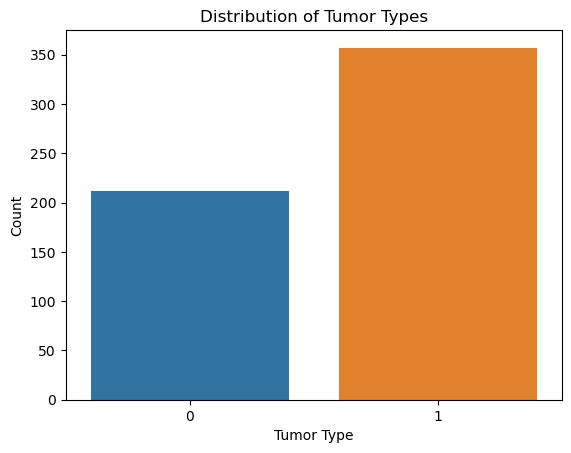

In [9]:
#Visualize the distribution of target variable
import seaborn as sns
sns.countplot(x = 'target', data = dt)
plt.title('Distribution of Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()

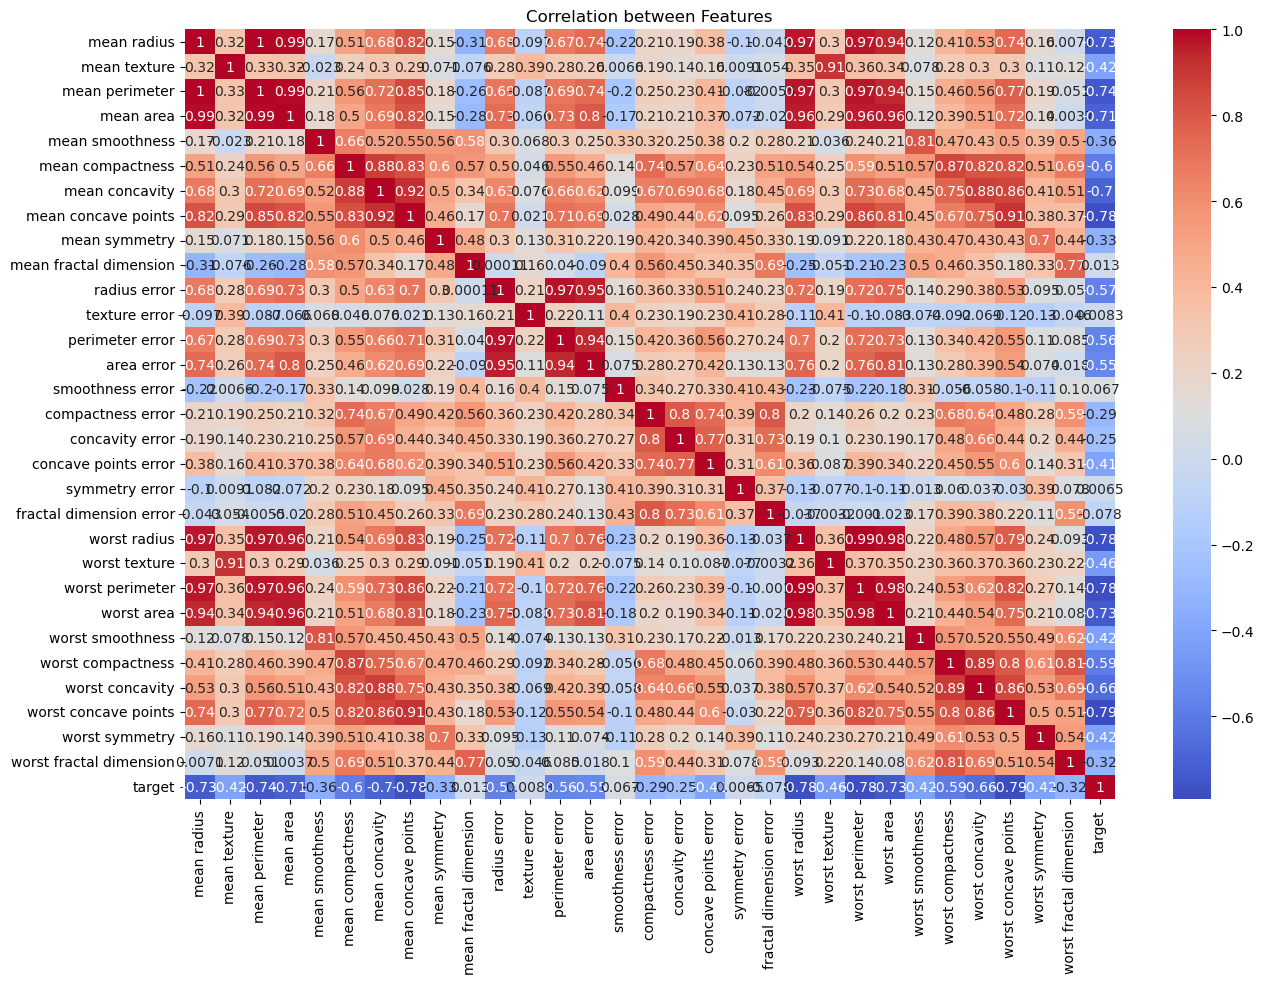

In [10]:
#Visualize the correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between Features')
plt.show()

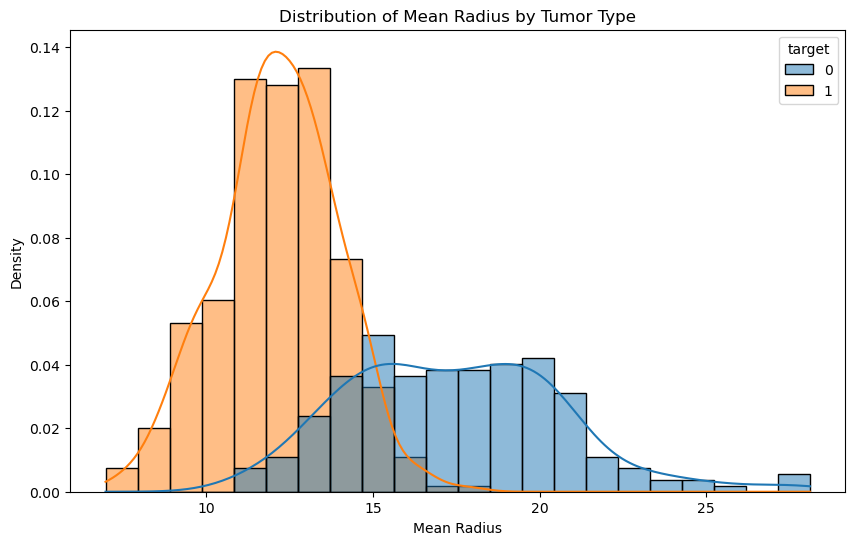

In [11]:
# Visualize the distribution of mean radius by tumor type
plt.figure(figsize=(10, 6))
sns.histplot(data = dt, x = 'mean radius', hue = 'target', kde = True, stat = 'density')
plt.title('Distribution of Mean Radius by Tumor Type')
plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.show()

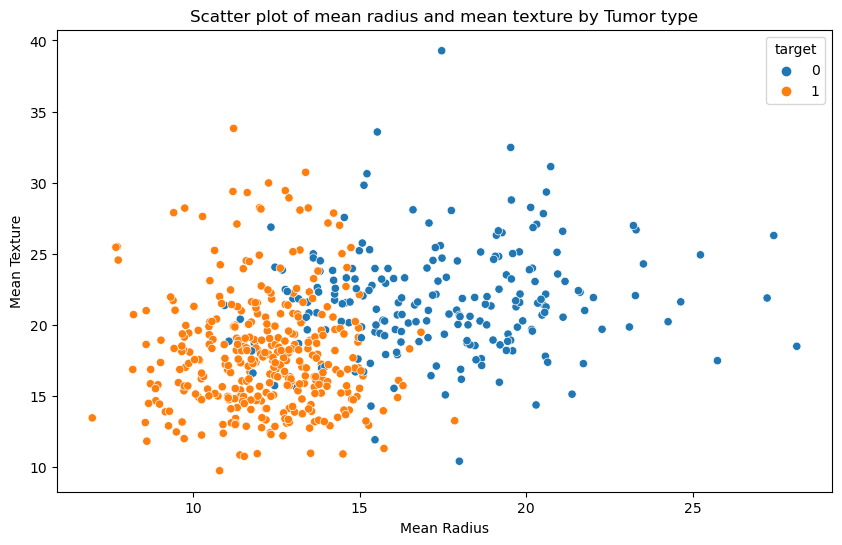

In [12]:
# Visualize the scatter plot of mean radius and mean texture by tumor type
plt.figure(figsize=(10,6))
sns.scatterplot(data=dt, x = 'mean radius', y = 'mean texture', hue = 'target')
plt.title('Scatter plot of mean radius and mean texture by Tumor type')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

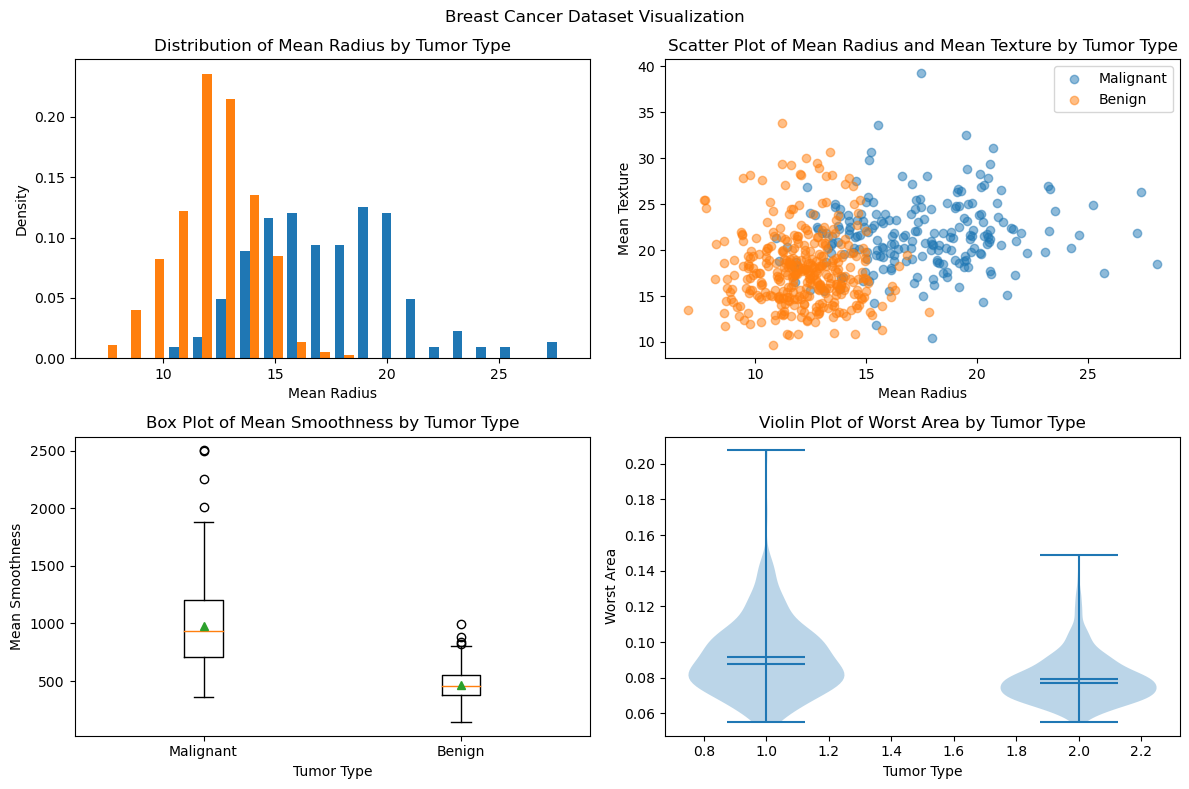

In [13]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Breast Cancer Dataset Visualization')

# Plot the distribution of mean radius by tumor type
axs[0, 0].hist([data.data[data.target == 0, 0], data.data[data.target == 1, 0]], 
               bins=20, color=['tab:blue', 'tab:orange'], density=True)
axs[0, 0].set_title('Distribution of Mean Radius by Tumor Type')
axs[0, 0].set_xlabel('Mean Radius')
axs[0, 0].set_ylabel('Density')

# Plot the scatter plot of mean radius and mean texture by tumor type
axs[0, 1].scatter(data.data[data.target == 0, 0], data.data[data.target == 0, 1], 
                  color='tab:blue', label='Malignant', alpha=0.5)
axs[0, 1].scatter(data.data[data.target == 1, 0], data.data[data.target == 1, 1], 
                  color='tab:orange', label='Benign', alpha=0.5)
axs[0, 1].set_title('Scatter Plot of Mean Radius and Mean Texture by Tumor Type')
axs[0, 1].set_xlabel('Mean Radius')
axs[0, 1].set_ylabel('Mean Texture')
axs[0, 1].legend()

# Plot the box plot of mean smoothness by tumor type
axs[1, 0].boxplot([data.data[data.target == 0, 3], data.data[data.target == 1, 3]], 
                  labels=['Malignant', 'Benign'], showmeans=True)
axs[1, 0].set_title('Box Plot of Mean Smoothness by Tumor Type')
axs[1, 0].set_xlabel('Tumor Type')
axs[1, 0].set_ylabel('Mean Smoothness')

# Plot the violin plot of worst area by tumor type
axs[1, 1].violinplot([data.data[data.target == 0, -1], data.data[data.target == 1, -1]], 
                     widths=0.5, showmeans=True, showmedians=True)
axs[1, 1].set_title('Violin Plot of Worst Area by Tumor Type')
axs[1, 1].set_xlabel('Tumor Type')
axs[1, 1].set_ylabel('Worst Area')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [14]:
#Import StandardScaler from sklearn to standardize data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [15]:
#Fit the data
dataset = scale.fit(dt)

In [16]:
scaled_data = dataset.transform(dt)

In [17]:
#The output is reduced to 2 principal components
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(n_components=2)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
x_pca.shape

(569, 2)

In [21]:
scaled_data.shape

(569, 31)

In [22]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461, -1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999, -1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121, -1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.77060855]])

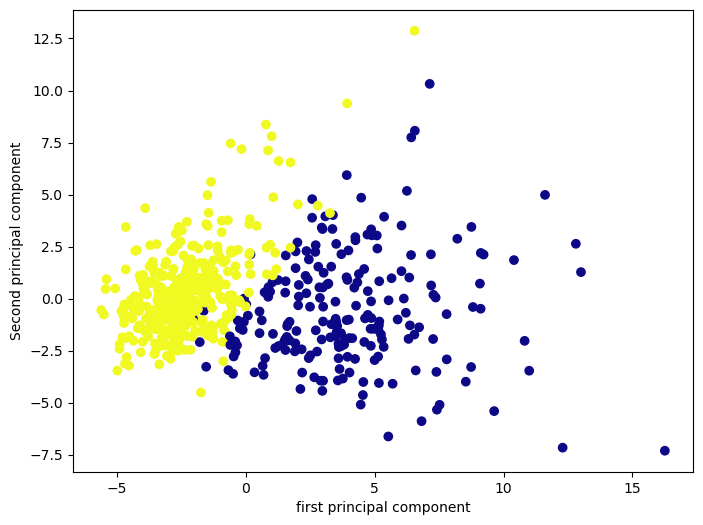

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data['target'], cmap = 'plasma')
plt.xlabel("first principal component")
plt.ylabel("Second principal component")
plt.show()

In [24]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, dt['target'], random_state=0)

In [25]:
# Scale the features using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Train a Logistic regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Evaluate the model's performance on the test set
y_pred = model.predict(X_test_scaled)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[52  1]
 [ 3 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



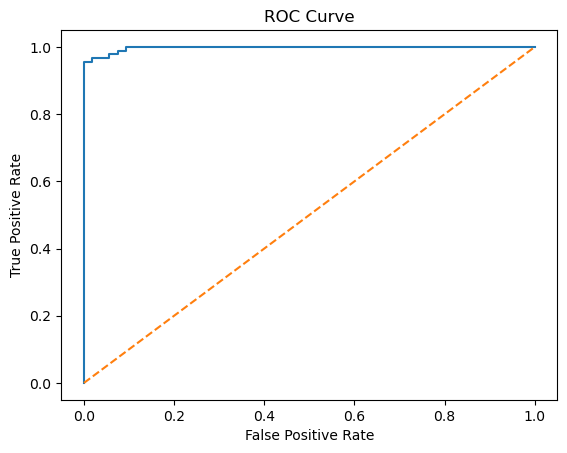

AUC score: 0.9972746331236898


In [28]:
# Visualize the ROC curve and calculate the AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC score:', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))